In [38]:
import numpy as np
import functs
from matplotlib import pyplot as py
%matplotlib inline

In [51]:
class Source:
    def __init__(self, sigma, xs, ys):  #functions within classes are methods
        self.sigma = sigma
        self.xs = xs        #varialbes within methods are atributes
        self.ys = ys
        
    def streamfunction(self, x, y):
        psi = self.sigma / (2 * np.pi) * np.arctan2(y - self.ys, x - self.xs)
        return psi
    
    def get_velocity(self, x, y):
        u, v = functs.get_velocity_source(self.sigma, self.xs, self.ys, x, y)
        return u , v
    
class Vortex:
    def __init__(self, strength, xs, ys):
        self.strength = strength
        self.xs = xs
        self.ys = ys
    
    def velocity(self, X, Y):
        u , v = functs.get_velocity_vortex(self.strength, self.xs, self.ys, X, Y)
        return u , v
    
    def streamfunction(self, X, Y):
        psi = functs.get_stream_vortex(self.strength, self.xs, self.ys, X, Y)
        return psi

In [28]:
s1 = Source(5.0, 0.0, 1.0)

In [29]:
s1.sigma

5.0

In [31]:
x = 1.1
y = 2.2
psi = s1.streamfunction(x, y)
print(psi)

u , v = s1.get_velocity(x, y)
print(u, v)

0.659577123916655
0.3303215800020469 0.3603508145476876


In [32]:
s2 = Source(5.0, 0.0, -1.0)

In [33]:
N = 100
x = np.linspace(-5.0, 5.0, N)
y = np.linspace(-5.0, 5.0, N)

X, Y = np.meshgrid(x, y)

In [45]:
psi_1 = s1.streamfunction(X, Y)
psi_2 = s2.streamfunction(X, Y)

psi_total = psi_1 + psi_2

u_1, v_1 = s1.get_velocity(X, Y)
u_2, v_2 = s2.get_velocity(X, Y)

u_total = u_1 + u_2
v_total = v_1 + v_2

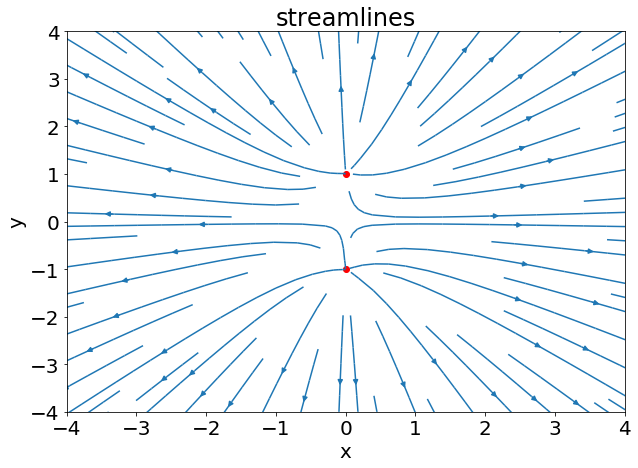

In [50]:
width = 10
height = 7
py.rcParams.update({'font.size': 20})
py.figure(figsize=(width, height))
py.title('streamlines')
py.xlabel('x')
py.ylabel('y')
py.streamplot(X, Y, u_total, v_total)
py.xlim(-4.0, 4.0)
py.ylim(-4.0, 4.0)
py.scatter([0.0, 0.0], [1.0, -1.0], color = 'r');



In [55]:
strength_vortex = 1.0
x_vortex, y_vortex = 0.0, 0.5

vortex_1 = Vortex(strength_vortex, x_vortex, y_vortex)
u_1, v_1 = vortex_1.velocity(X , Y)
psi_1 = vortex_1.streamfunction(X, Y)

#create image on opposite side of vortex
vortex_2 = Vortex(-strength_vortex, x_vortex, -y_vortex)
u_2 , v_2 = vortex_2.velocity(X , Y)
psi_2 = vortex_2.streamfunction(X , Y)

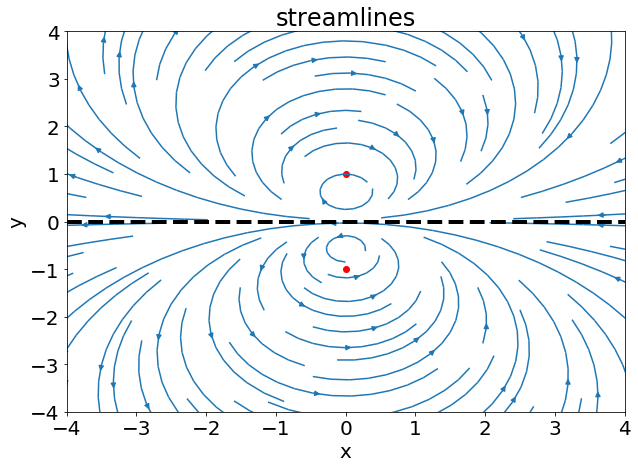

In [57]:
#superposition
u_total = u_1 + u_2
v_total = v_1 + v_2
psi = psi_1 + psi_2

width = 10
height = 7
py.rcParams.update({'font.size': 20})
py.figure(figsize=(width, height))
py.title('streamlines')
py.xlabel('x')
py.ylabel('y')
py.streamplot(X, Y, u_total, v_total)
py.xlim(-4.0, 4.0)
py.ylim(-4.0, 4.0)
py.scatter([0.0, 0.0], [1.0, -1.0], color = 'r')
py.axhline(0.0, color='k', linestyle='--', linewidth=4);

In [60]:
strength_vortex = 1.0
x_vortex1, y_vortex1 = -1.0, 0.5
x_vortex2, y_vortex2 = 1.0, 0.5

vortex1 = Vortex(strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

# compute the velocity and stream
psi1 = vortex1.streamfunction(X, Y)
psi2 = vortex2.streamfunction(X, Y)
u_1 , v_1 = vortex1.velocity(X , Y)
u_2 , v_2 = vortex2.velocity(X, Y)

